In [3]:
import pandas as pd
import json


Read the json file in a dataframe structure

In [4]:
df_business_articles = pd.read_json('business_articles_2022.json', lines=True)

Show the columns of the dataframe

In [5]:
df_business_articles.columns

Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')

In [6]:
df_business_articles.iloc[0]

_index                                          all_articles
_type                                                    doc
_id                                               1085544577
_score                                              3.216213
_source    {'link': 'https://www.reuters.com/world/chinas...
Name: 0, dtype: object

Concentrate on the "_source" column containing the actual json data: extract it to a new table called : df_business_articles_data

In [7]:
df_business_articles_data = pd.DataFrame(df_business_articles["_source"].values.tolist())
df_business_articles_data.shape

(64312, 11)

Show the columns (field names) of the "json" elements

In [8]:
df_business_articles_data.columns

Index(['link', '@version', 'published', 'author', 'title', 'type',
       '@timestamp', 'message', 'Feed', 'full-text', 'tags'],
      dtype='object')

In [9]:
df_business_articles_data['published_date'] = pd.to_datetime(df_business_articles_data['published'])
df_business_articles_data['week'] = df_business_articles_data['published_date'].dt.strftime('%Y-%U')
weekly_counts = df_business_articles_data.groupby('week').size().reset_index(name='count')


In [10]:
import matplotlib.pyplot as plt

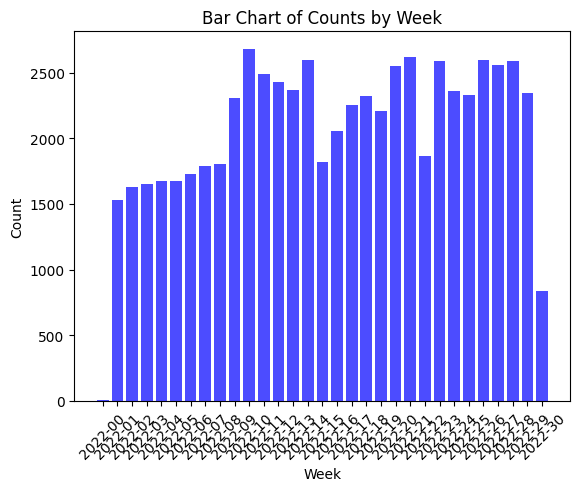

In [11]:
plt.bar(weekly_counts['week'], weekly_counts['count'], color='blue', alpha=0.7)
# Add labels and a title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Bar Chart of Counts by Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [12]:
import seaborn as sns

C:\Users\hbailleux\AppData\Local\Temp\ipykernel_14212\2526006448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="week", y="count", data=weekly_counts, palette="Blues")


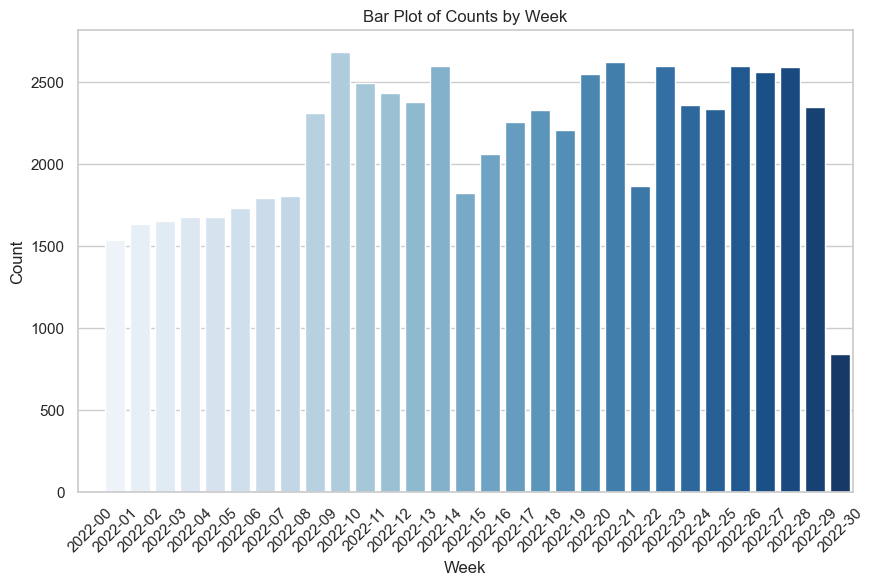

In [13]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x="week", y="count", data=weekly_counts, palette="Blues")

# Add labels and a title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Bar Plot of Counts by Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<b><h2 style="color:green;">Explore the data : Calculate and print some statistics : document count, covered time window, find at least 5 other statistics, define and calculate them. 

<b><h3 style="color:orange;"> Get publication Week of article about Covid 

In [14]:
df_business_articles_data.iloc[5278]

link              https://www.reuters.com/markets/currencies/chi...
@version                                                          1
published                                  2022-01-11T05:16:00.000Z
author                                                         None
title             China's yuan firms, but upside limited as Fed ...
type                                                            rss
@timestamp                                 2022-01-11T07:17:56.303Z
message           <a href="https://www.reuters.com/markets/curre...
Feed              https://news.google.com/rss/search?q=when:24h+...
full-text         SHANGHAI, Jan 11 (Reuters) - China's yuan edge...
tags                                                            NaN
published_date                            2022-01-11 05:16:00+00:00
week                                                        2022-02
Name: 5278, dtype: object

In [15]:
df_business_articles.iloc[5214]

_index                                          all_articles
_type                                                    doc
_id                                               1236465651
_score                                              3.216213
_source    {'Feed': 'https://news.google.com/rss/search?q...
Name: 5214, dtype: object

In [16]:
covid=[]
for i in range(len(df_business_articles_data)):
    article=df_business_articles_data.iloc[i]
    text=article["full-text"]
    if("Covid" in str(text)): 
        covid.append(True)
    else:
        covid.append(False)
df_business_articles_data['Covid'] = covid


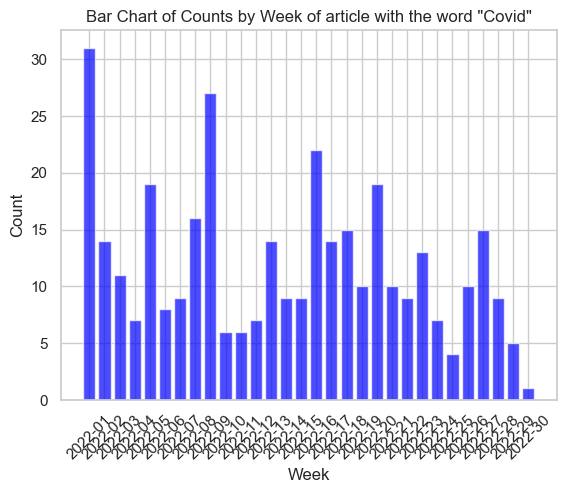

In [17]:
df_business_articles_data['published_date'] = pd.to_datetime(df_business_articles_data['published'])
df_business_articles_data['week'] = df_business_articles_data['published_date'].dt.strftime('%Y-%U')
weekly_counts = df_business_articles_data.where(df_business_articles_data["Covid"]==True).groupby('week').size().reset_index(name='count')

plt.bar(weekly_counts['week'], weekly_counts['count'], color='blue', alpha=0.7)
# Add labels and a title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Bar Chart of Counts by Week of article with the word "Covid"')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<b><h2 style="color:green;">Clean the title



<b><h3 style="color:yellow;">
- Lower casing




In [18]:
lower_title=[]
for i in range(len(df_business_articles_data)):
    article=df_business_articles_data.iloc[i]
    title=article["title"].lower()
    lower_title.append(title)
    
df_business_articles_data['lower_title'] = lower_title


In [19]:
df_business_articles_data.iloc[5278]

link              https://www.reuters.com/markets/currencies/chi...
@version                                                          1
published                                  2022-01-11T05:16:00.000Z
author                                                         None
title             China's yuan firms, but upside limited as Fed ...
type                                                            rss
@timestamp                                 2022-01-11T07:17:56.303Z
message           <a href="https://www.reuters.com/markets/curre...
Feed              https://news.google.com/rss/search?q=when:24h+...
full-text         SHANGHAI, Jan 11 (Reuters) - China's yuan edge...
tags                                                            NaN
published_date                            2022-01-11 05:16:00+00:00
week                                                        2022-02
Covid                                                         False
lower_title       china's yuan firms, but upside

<b><h3 style="color:yellow;">
- Stopword removal

In [20]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

no_stopwords_title=[]
for i in range(len(df_business_articles_data)):
    
    article=df_business_articles_data.iloc[i]
    title=article["lower_title"]
    
    stop_words = set(stopwords.words('english'))
    
    word_tokens = word_tokenize(title)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    no_stopwords_title.append(filtered_sentence)
    
df_business_articles_data['no_stopwords_title'] = no_stopwords_title


 

In [23]:
df_business_articles_data.iloc[0]

link                  https://www.reuters.com/world/chinas-xi-meets-...
@version                                                              1
published                                      2022-02-05T12:16:00.000Z
author                                                             None
title                 China's Xi meets more heads of state in Winter...
type                                                                rss
@timestamp                                     2022-02-05T12:49:27.954Z
message               <a href="https://www.reuters.com/world/chinas-...
Feed                  https://news.google.com/rss/search?q=when:24h+...
full-text             BEIJING, Feb 5 (Reuters) - Chinese President X...
tags                                                                NaN
published_date                                2022-02-05 12:16:00+00:00
week                                                            2022-05
Covid                                                           

<b><h3 style="color:yellow;">
- Stemming